In [ ]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ8E2EG/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ8E2EG/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

#train_dataset =  train_dataset.cache()
#test_dataset  =  test_dataset.cache()

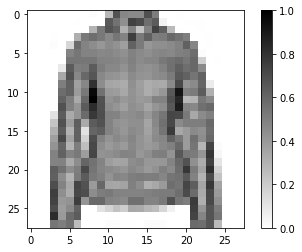

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

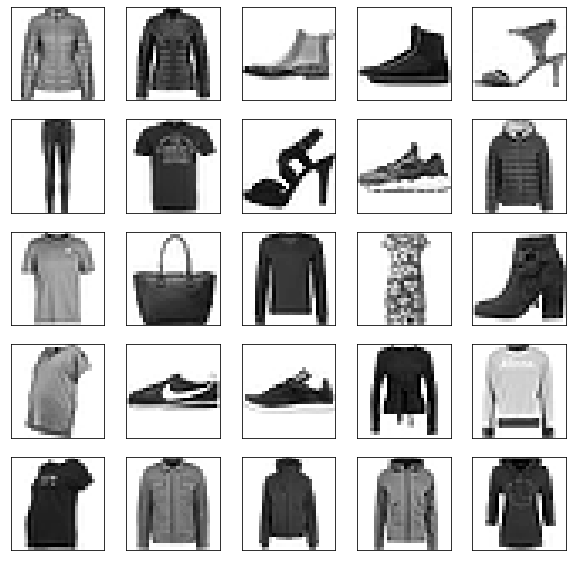

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [ ]:
BATCH_SIZE = 4
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
print (train_dataset)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(1024, activation='tanh'),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/10
15000/15000 [==============================] - 220s 15ms/step - loss: 0.7294 - accuracy: 0.7304
Epoch 2/10
15000/15000 [==============================] - 228s 15ms/step - loss: 0.6056 - accuracy: 0.7786
Epoch 3/10
15000/15000 [==============================] - 229s 15ms/step - loss: 0.5827 - accuracy: 0.7929
Epoch 4/10
15000/15000 [==============================] - 224s 15ms/step - loss: 0.5571 - accuracy: 0.8012
Epoch 5/10
15000/15000 [==============================] - 204s 14ms/step - loss: 0.5327 - accuracy: 0.8130
Epoch 6/10
15000/15000 [==============================] - 198s 13ms/step - loss: 0.5295 - accuracy: 0.8135
Epoch 7/10
15000/15000 [==============================] - 213s 14ms/step - loss: 0.5328 - accuracy: 0.8120
Epoch 8/10
15000/15000 [==============================] - 208s 14ms/step - loss: 0.5287 - accuracy: 0.8117
Epoch 9/10
15000/15000 [==============================] - 211s 14ms/step - loss: 0.5287 - accuracy: 0.8138
Epoch 10/10
15000/15000 [============

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

2500/2500 [==============================] - 5s 2ms/step - loss: 0.4153 - accuracy: 0.8596
Accuracy on test dataset: 0.8596000075340271


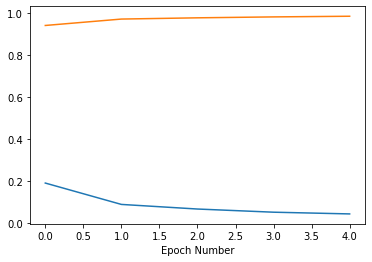

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

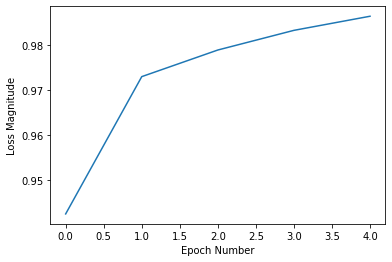

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\ibrah\AppData\Local\Temp\tmpzms10img\assets
INFO:tensorflow:Assets written to: C:\Users\ibrah\AppData\Local\Temp\tmpzms10img\assets


In [ ]:
tflite_model_file = "mnist_model.tflite"
open(tflite_model_file, 'wb').write(tflite_model)

408584